In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format= '{:.2f}'.format
pd.options.display.max_columns= None
pd.options.display.max_rows=  None

In [118]:


def wrangle(filename, encoding=None, date_column=None, dropna_nan_columns=[],dropna_nan_columns0=False, drop_duplicates_columns=None, change_column_name={} ):
    global df
    df = pd.read_csv(filename, encoding=encoding)  #0. Load the dataset

    #1. Clean column names: remove spaces and convert to lowercase
    df.columns = df.columns.str.strip().str.lower()

    #2. convert space to _
    df.columns=df.columns.str.replace(' ','_')


    #3- Convert the specified column to datetime if provided
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column]) 

    #4- Drop all columns that contain only NaN values    
    if dropna_nan_columns0:
        df=df.dropna(axis=1 , how='all')    
    
    #5- Drop rows with NaN values in the specified columns
    if dropna_nan_columns:
        df.dropna(subset=dropna_nan_columns, inplace=True)

    #6- Remove duplicate rows based on specified columns
    if drop_duplicates_columns:
        df.drop_duplicates(subset=drop_duplicates_columns, inplace=True)

    
    #7- Rename columns if a mapping is provided
    if change_column_name:
        df.rename(columns=change_column_name, inplace=True)
    


    return df


In [119]:
df = wrangle('online_sales_data.csv',date_column="date")
df.head()

,transaction_id,date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    240 non-null    int64         
 1   date              240 non-null    datetime64[ns]
 2   product_category  240 non-null    object        
 3   product_name      240 non-null    object        
 4   units_sold        240 non-null    int64         
 5   unit_price        240 non-null    float64       
 6   total_revenue     240 non-null    float64       
 7   region            240 non-null    object        
 8   payment_method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


# <span style="color: orange; font-size: 30px;">1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.</span>

In [121]:
df=df.set_index('date')
sales_trend=df['total_revenue'].resample('1ME').sum().to_frame()
sales_trend

,total_revenue
date,
2024-01-31,14548.32
2024-02-29,10803.37
2024-03-31,12849.24
2024-04-30,12451.69
2024-05-31,8455.49
2024-06-30,7384.55
2024-07-31,6797.08
2024-08-31,7278.11


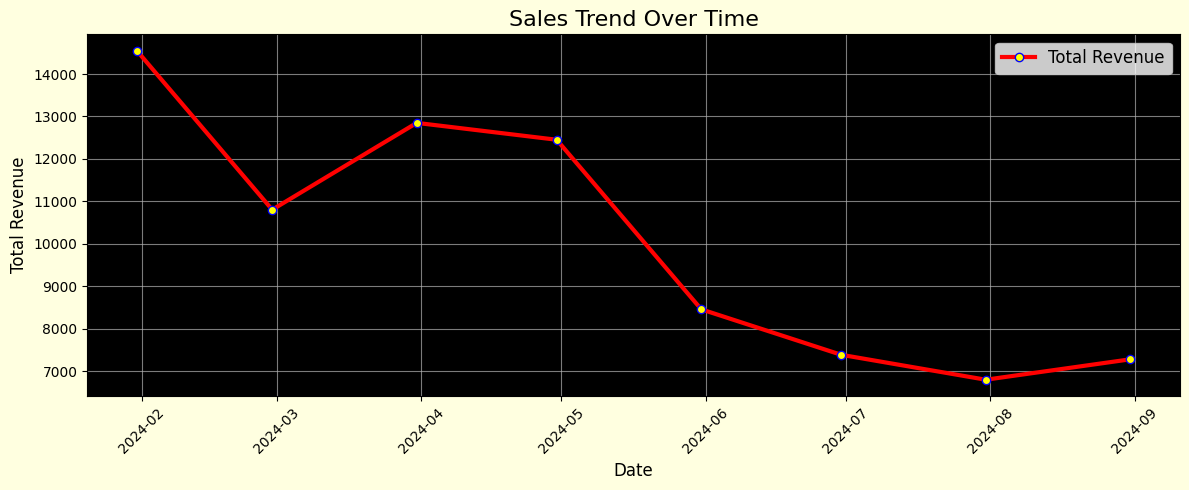

In [122]:
plt.figure(figsize=(12, 5) , facecolor='lightyellow')
plt.plot(sales_trend.index, sales_trend, color='red', marker='o', linestyle='-', label='Total Revenue' , linewidth=3 ,  markerfacecolor='yellow' , markeredgecolor='blue')
# Enhancing the visualization
plt.gca().set_facecolor('black')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(alpha=0.7)
plt.legend(fontsize=12)  # related with label parameter
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# <span style="color: orange; font-size: 30px;">2. Explore the popularity of different product categories across regions.</span>



In [123]:
df.head()

,transaction_id,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
date,,,,,,,,
2024-01-01,10001,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
2024-01-02,10002,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2024-01-03,10003,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
2024-01-04,10004,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
2024-01-05,10005,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [124]:
popularity_product_categories = df.groupby(['product_category' , 'region'])['units_sold'].sum().to_frame()
popularity_product_categories

,,units_sold
product_category,region,
Beauty Products,Europe,46
Books,North America,114
Clothing,Asia,145
Electronics,North America,66
Home Appliances,Europe,59
Sports,Asia,88


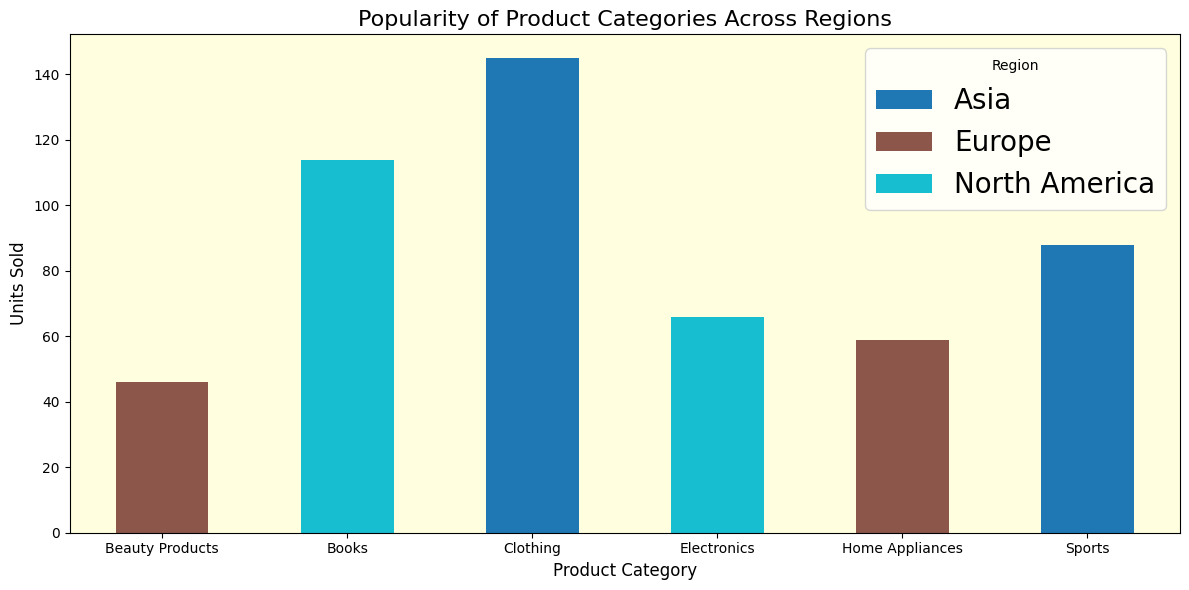

In [125]:
# Pivot the data to prepare for a stacked bar chart
stacked_data = popularity_product_categories.reset_index().pivot(
    index='product_category', columns='region', values='units_sold'
)


# Plot a stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10') 
plt.gca().set_facecolor('lightyellow')
plt.title('Popularity of Product Categories Across Regions', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Region', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


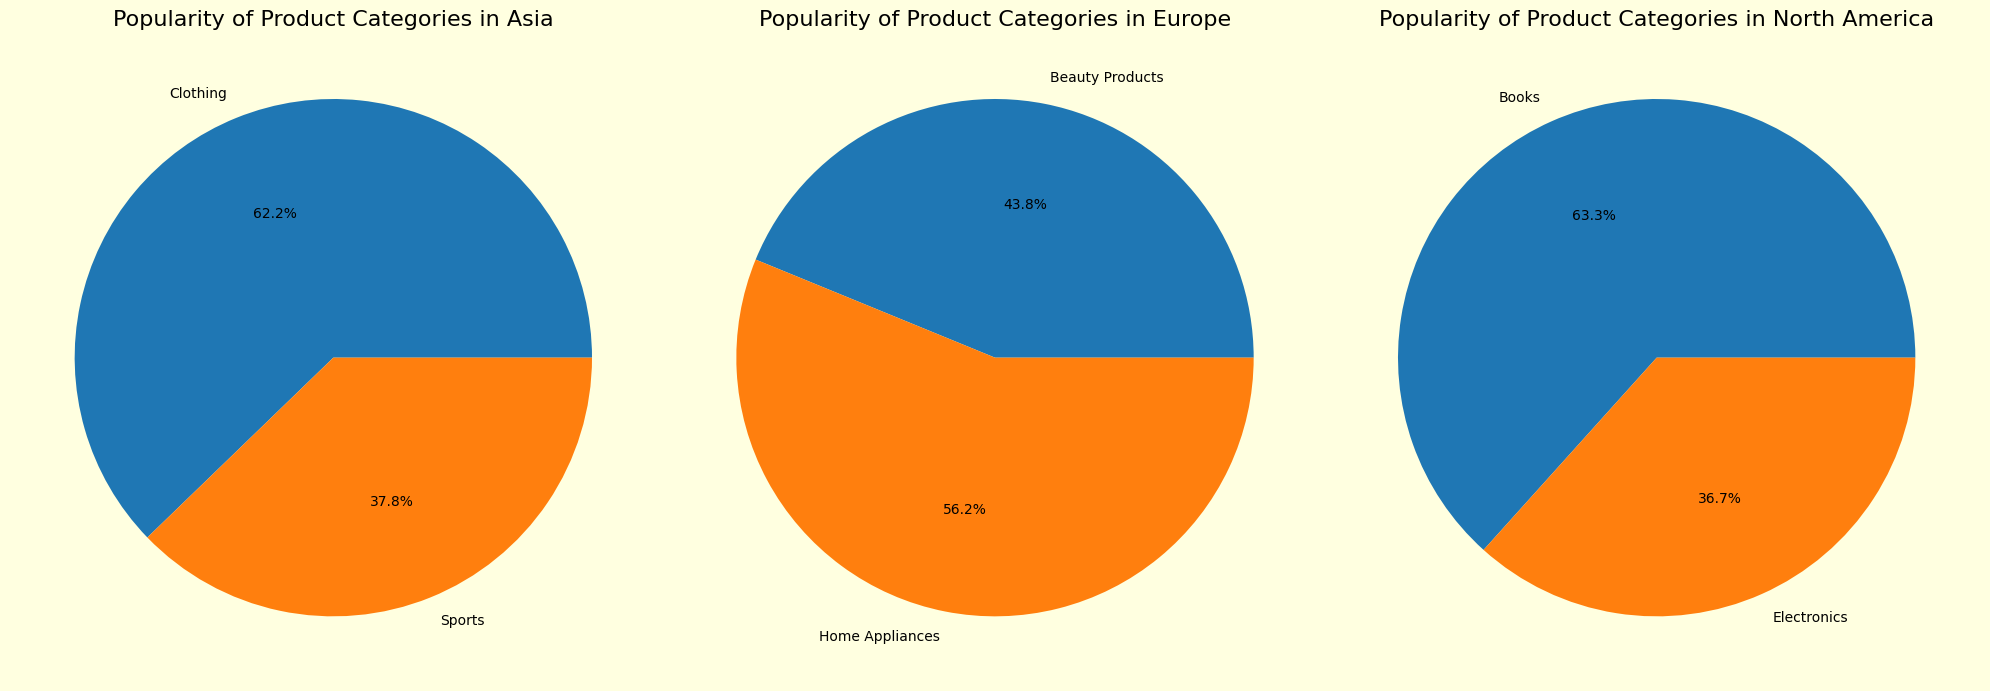

In [126]:
# Create a figure with subplots
regions = popularity_product_categories.index.levels[1]
num_regions = len(regions)  
fig, axes = plt.subplots(1, num_regions, figsize=(20, 12), facecolor='lightyellow')

for i, region in enumerate(regions):
    region_data = popularity_product_categories.xs(region, level='region')
    axes[i].pie(
        region_data['units_sold'],
        labels=region_data.index,
        autopct='%1.1f%%'
    )
    axes[i].set_title(f'Popularity of Product Categories in {region}', fontsize=16)  
plt.tight_layout()
plt.show()


# <span style="color: orange; font-size: 30px;">3. Investigate the impact of payment methods on sales volume or revenue.</span>


In [127]:
df.sample(4)

,transaction_id,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
date,,,,,,,,
2024-06-07,10159,Clothing,Under Armour Tech 2.0 T-Shirt,4,24.99,99.96,Asia,Debit Card
2024-02-05,10036,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card
2024-01-24,10024,Sports,Adidas FIFA World Cup Football,3,29.99,89.97,Asia,Credit Card
2024-01-31,10031,Electronics,Sony WH-1000XM4 Headphones,2,349.99,699.98,North America,Credit Card


In [128]:
df['payment_method'].value_counts()

payment_method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

In [129]:
payment_methods_impact =df.groupby('payment_method')['total_revenue'].mean().to_frame().sort_values('total_revenue' , ascending=False)
payment_methods_impact

,total_revenue
payment_method,
Credit Card,426.42
PayPal,265.85
Debit Card,203.22


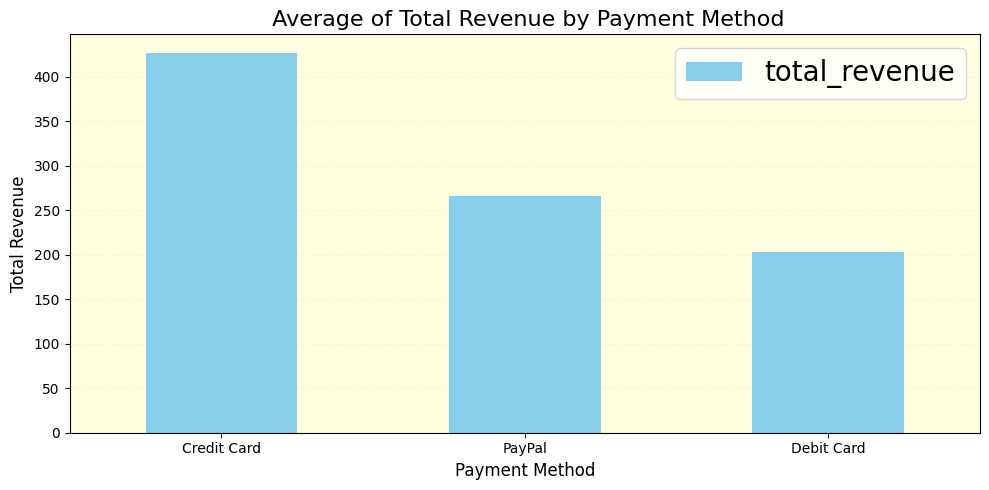

In [130]:

payment_methods_impact.plot(kind='bar' ,figsize=(10,5) ,color ='skyblue' )
plt.xlabel('Payment Method' , fontsize=12)
plt.ylabel('Total Revenue' , fontsize=12)
plt.title(' Average of Total Revenue by Payment Method' , fontsize=16)
plt.gca().set_facecolor('lightyellow')
plt.grid(axis='y' , linestyle='--' , alpha=0.1)
plt.legend(fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# <span style="color: orange; font-size: 30px;">4. Identify top-selling products within each category to optimize inventory and marketing strategies.</span>



In [131]:
df.sample(5)

,transaction_id,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
date,,,,,,,,
2024-05-05,10126,Sports,Yeti Roadie 24 Cooler,1,199.99,199.99,Asia,Credit Card
2024-07-15,10197,Beauty Products,Tom Ford Black Orchid Perfume,1,125.00,125.00,Europe,PayPal
2024-08-25,10238,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
2024-06-04,10156,Sports,Garmin Forerunner 245,1,299.99,299.99,Asia,Credit Card
2024-06-17,10169,Electronics,Samsung Odyssey G7 Gaming Monitor,1,699.99,699.99,North America,Credit Card


In [132]:
# Find the top-selling product in each category based on units_sold
# Step 1: Group by product_category and product_name, and sum the units_sold
grouped = df.groupby(['product_category', 'product_name'], as_index=False)['units_sold'].sum()
grouped
# Step 2: Find the product with the highest units_sold in each category
top_selling = grouped.loc[grouped.groupby('product_category')['units_sold'].idxmax()]
top_selling


,product_category,product_name,units_sold
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2
52,Books,The Catcher in the Rye by J.D. Salinger,7
91,Clothing,Hanes ComfortSoft T-Shirt,10
116,Electronics,Amazon Echo Dot (4th Gen),4
171,Home Appliances,Eufy RoboVac 11S,3
220,Sports,Spalding NBA Street Basketball,6


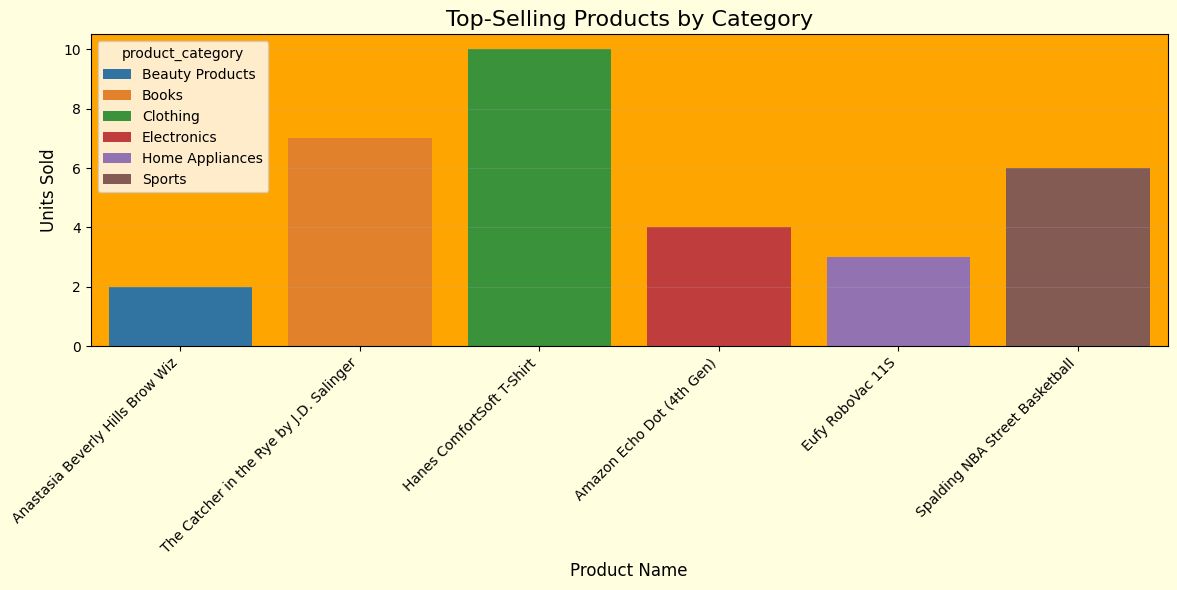

In [133]:
plt.figure(figsize=(12, 6), facecolor='lightyellow')
sns.barplot(data=top_selling, x='product_name', y='units_sold', hue='product_category', dodge=False)

plt.title('Top-Selling Products by Category', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)

plt.gca().set_facecolor('orange')
plt.grid(axis='y' , alpha=0.2)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()



# <span style="color: orange; font-size: 30px;">5. Evaluate the performance of Electronics category in different regions to tailor marketing campaigns accordingly.</span>



In [134]:
df.head()

,transaction_id,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
date,,,,,,,,
2024-01-01,10001,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
2024-01-02,10002,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2024-01-03,10003,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
2024-01-04,10004,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
2024-01-05,10005,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [140]:
# Filter the Electronics category
electronics_data = df[df['product_category'] == 'Electronics']

# Group by region and calculate total units sold and revenue
performance = electronics_data.groupby('region').agg(
    total_units_sold=('units_sold', 'sum'),
    total_revenue=('total_revenue', 'sum'),
    average_revenue_per_unit=('total_revenue', lambda x: x.sum() / electronics_data['units_sold'].sum())
).reset_index()

# Display the performance DataFrame
print(performance)


          region  total_units_sold  total_revenue  average_revenue_per_unit
0  North America                66       34982.41                    530.04
